In [10]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

In [3]:
annotations_shapefile = "data/shapefile/grid/swiss_tree_annotations_with_filtered_grid.shp"
anno_df = gpd.read_file(annotations_shapefile)

split_csv = "data/grid_split_result.csv"
grid_split = pd.read_csv(split_csv)

anno_centroids = anno_df.copy()
anno_centroids["geometry"] = anno_centroids.geometry.centroid
anno_df['grid_id'] = anno_df['grid_id'].astype(int)

In [4]:
anno_with_split = anno_df.merge(grid_split, on="grid_id", how="left")

split_counts = anno_with_split["split"].value_counts()

print("🌳 Total samples per split:")
print(split_counts)

🌳 Total samples per split:
split
train         17089
validation     3660
test           3659
Name: count, dtype: int64


In [6]:
species_split_counts = (
    anno_with_split.groupby(["split", "TreeAI_ID"])
    .size()
    .unstack(fill_value=0)
)

REMOVE_SPECIES = [49, 62, 64]
species_split_counts = species_split_counts.drop(columns=REMOVE_SPECIES, errors='ignore')

print("Number of samples per species in each split (after removal):")
print(species_split_counts)

Number of samples per species in each split (after removal):
TreeAI_ID     3    6    9     12    13    24   26  30  36   43   56   63
split                                                                   
test         415  123  124   235  2111   265   72   5   7  139  119   44
train       1940  574  579  1094  9854  1237  334  27  42  646  555  206
validation   416  123  124   234  2112   265   71   5   7  138  119   44


In [7]:
species_split_counts.to_csv("data/split_species_counts_filtered.csv")

In [12]:
species_split_counts = species_split_counts[
    species_split_counts.loc["train"].sort_values(ascending=False).index
]

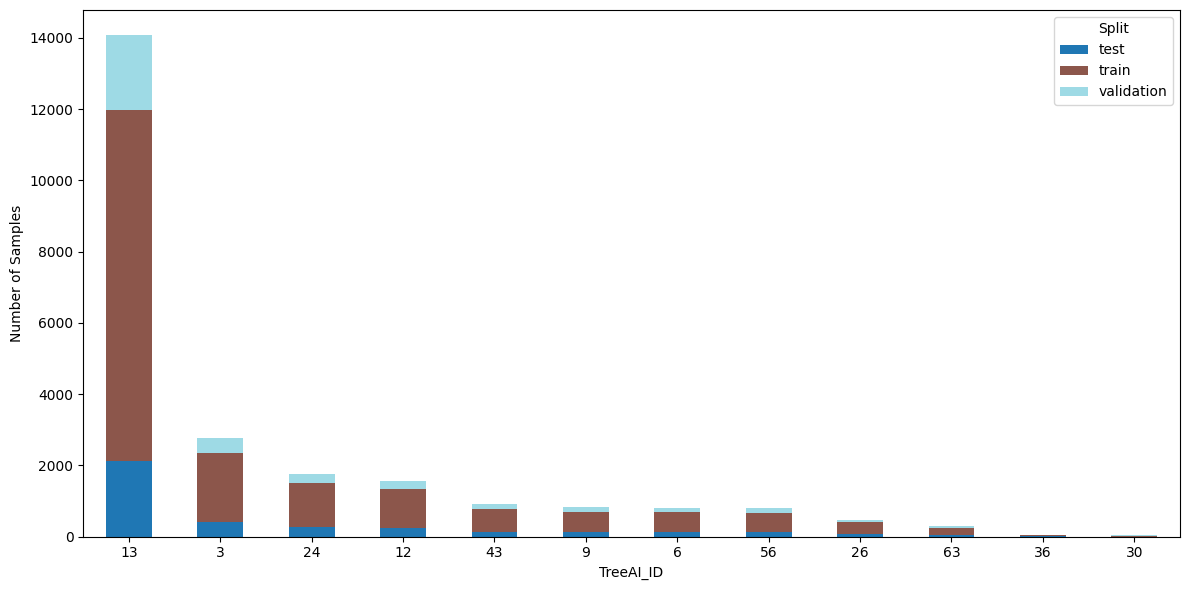

In [16]:
species_split_counts.T.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='tab20'
)

plt.xlabel("TreeAI_ID")
plt.ylabel("Number of Samples")
plt.legend(title="Split")
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

In [97]:
import os
import cv2
from PIL import Image
import numpy as np
import rasterio
from matplotlib import pyplot as plt

In [98]:
image_id = "6387"
root_path = f"data/test_set/rgb_dsm_fusion/"

rgb_path = os.path.join(root_path, "rgb", f"{image_id}.png")
dem_path = os.path.join(root_path, "dem", f"{image_id}.tif")
dsm_path = os.path.join(root_path, "dsm", f"{image_id}.tif")

In [99]:
image = np.array(Image.open(rgb_path).convert("RGB"))
with rasterio.open(dem_path) as dem_src, rasterio.open(dsm_path) as dsm_src:
    dem = dem_src.read().squeeze()
    dsm = dsm_src.read().squeeze()
vhm = dsm - dem
image.shape, dem.shape, dsm.shape, vhm.shape

((600, 600, 3), (120, 120), (120, 120), (120, 120))

In [100]:
vhm[vhm < 5] = 0
vhm_norm = (vhm - vhm.min()) / (vhm.max() - vhm.min() + 1e-8)

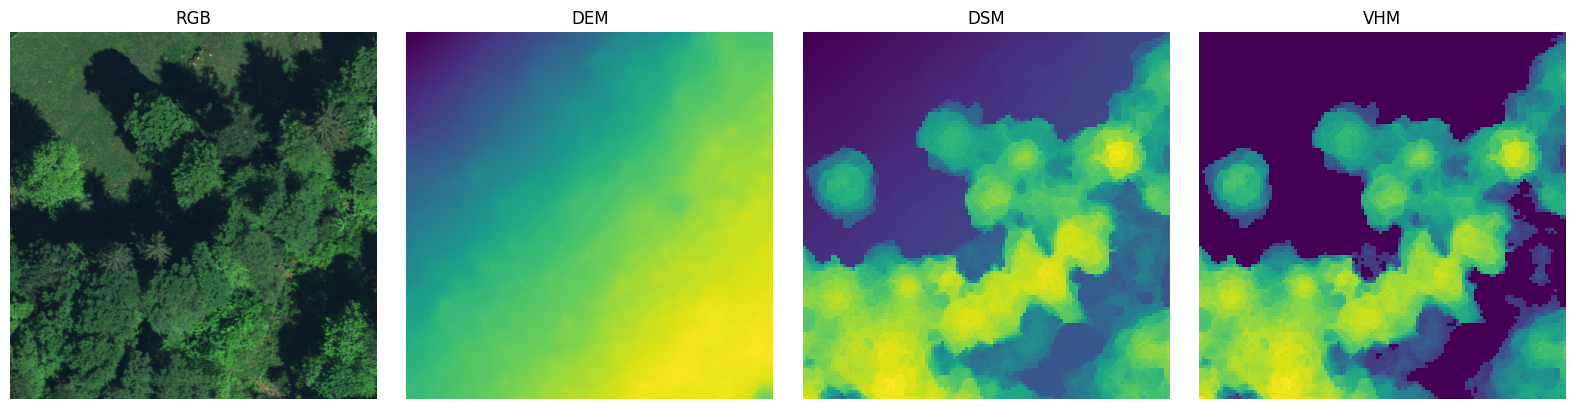

In [101]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title("RGB")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(dem)
plt.title("DEM")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(dsm)
plt.title("DSM")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(vhm)

plt.title("VHM")
plt.axis("off")

plt.tight_layout()
plt.show()

(np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5))

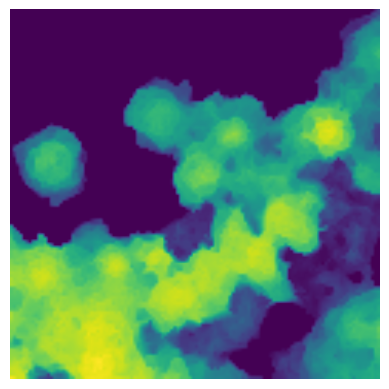

In [96]:
plt.imshow(vhm)
plt.axis("off")